1. Design a deep learning technique for detecting brain tumor images from the given dataset.
2. Validate and evaluate the performance of the model.
- 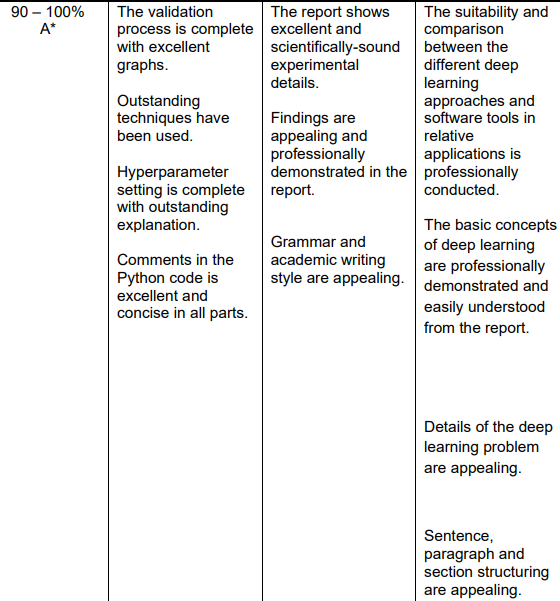


In [98]:
%pip install keras tensorflow
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       2.1.0
altgraph                      0.17.4
asgiref                       3.8.1
asttokens                     3.0.0
astunparse                    1.6.3
bcrypt                        4.2.1
blinker                       1.7.0
certifi                       2025.1.31
cffi                          1.17.1
charset-normalizer            3.4.1
click                         8.1.7
colorama                      0.4.6
comm                          0.2.2
contourpy                     1.3.1
coverage                      7.3.3
cryptography                  44.0.2
cycler                        0.12.1
debugpy                       1.8.12
decorator                     5.2.1
distlib                       0.3.8
Django                        5.1.5
django-cors-headers           4.7.0
django-extensions             3.2.3
djangorestframework           3.15.2
djangorestframework_simplejwt 5.4.0
executing 

In [1]:
import keras
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2 
from PIL import Image
import random
import tensorflow as tf


First, rename all files to standardised enumeration and file format (.jpg)

In [ ]:
# Define dataset path
dataset_path = "brain_tumor_dataset"

# Loop through "no" and "yes" folders
for label in ["no", "yes"]:
    folder_path = os.path.join(dataset_path, label)
    images = sorted(glob.glob(os.path.join(folder_path, "*")))  # Get all files

    # Rename files
    for idx, img_path in enumerate(images, start=1):
        new_name = f"{label}_{idx}.jpg"
        new_path = os.path.join(folder_path, new_name)
        
        # Rename file
        os.rename(img_path, new_path)
        

Manually remove the outlier images. These include images of frontal (coronal) plane of the brain and an image of a torso

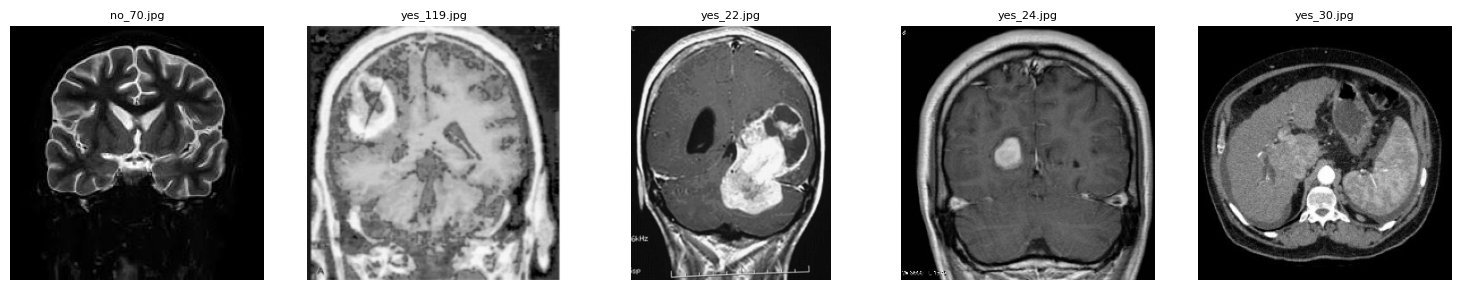

In [ ]:
# Path to the outlier folder
outlier_folder = "outliers"

# Get image files (only jpg)
image_files = sorted([f for f in os.listdir(outlier_folder) if f.lower().endswith("jpg")])

# Load and display images in a single row
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 3))

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(outlier_folder, image_file)
    img = cv2.imread(img_path)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
    
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(image_file, fontsize=8)

plt.tight_layout()
plt.show()


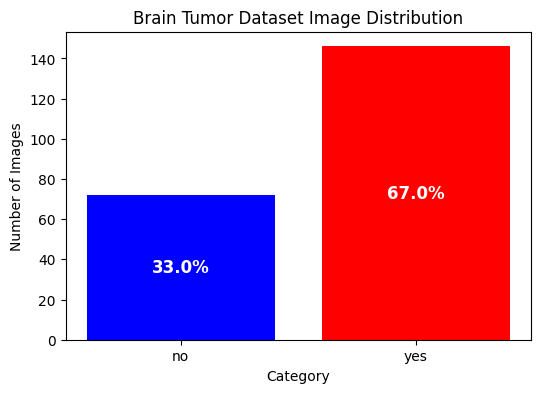

In [ ]:
# Define processed images folder
dataset_path = "brain_tumor_dataset"

# Count images in each category
counts = {}
for label in ["no", "yes"]:
    folder_path = os.path.join(dataset_path, label)
    counts[label] = sum(os.path.isfile(os.path.join(folder_path, f)) for f in os.listdir(folder_path))

# Compute total images
total_images = sum(counts.values())

# Compute percentages
percentages = {label: (count / total_images) * 100 for label, count in counts.items()}

# Plot bar graph
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.keys(), counts.values(), color=['blue', 'red'])

# Add percentage labels inside bars
for bar, label in zip(bars, counts.keys()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,  # Move text inside the bar
             f"{percentages[label]:.1f}%", ha='center', va='center', 
             fontsize=12, fontweight='bold', color='white')  # White text for contrast

# Labels and title
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Brain Tumor Dataset Image Distribution")
plt.show()


Preprocess the images for a standardised size and grayscale and crop the brain

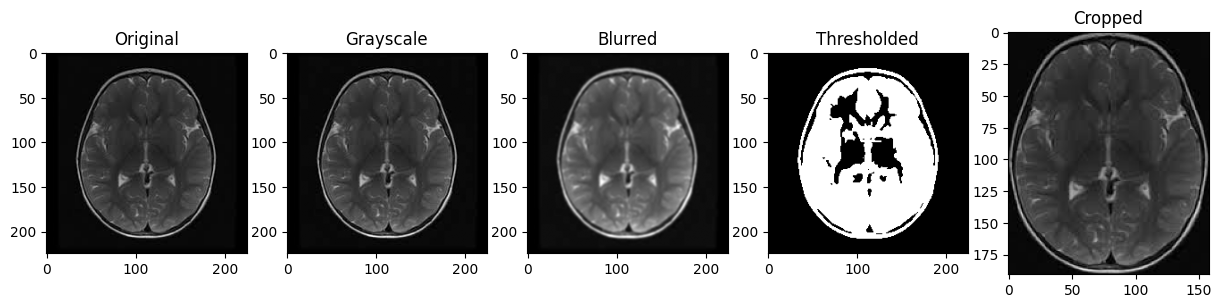

In [27]:
import cv2
import matplotlib.pyplot as plt

def process_image(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found at:", image_path)
        return
    
    # Step 2: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 4: Thresholding
    _, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)

    # Step 5: Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        cropped_image = image[y:y+h, x:x+w]
    else:
        cropped_image = image  # If no contours, keep the original image

    # Display all steps in one row
    plt.figure(figsize=(15,5))
    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original')

    plt.subplot(1, 5, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')

    plt.subplot(1, 5, 3)
    plt.imshow(blurred, cmap='gray')
    plt.title('Blurred')

    plt.subplot(1, 5, 4)
    plt.imshow(thresh, cmap='gray')
    plt.title('Thresholded')

    plt.subplot(1, 5, 5)
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title('Cropped')

    plt.show()

# Example usage
image_path = 'brain_tumor_dataset/no/no_3.jpg'  # Update the path as needed
process_image(image_path)


In [ ]:
def crop_brain_region(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        return image[y:y+h, x:x+w]
    return image

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
import cv2
import numpy as np

# Function to preprocess and standardize images
def standardize_images(image_folder, target_size=(224, 224)):
    # Get all image files in the folder
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('jpg'))])

    for image_file in image_files:
        img_path = os.path.join(image_folder, image_file)
        
        # Load image and convert to numpy array
        img = load_img(img_path)
        img = img_to_array(img).astype(np.uint8)
        
        # Use the crop_brain_region function to crop the brain area
        cropped = crop_brain_region(img)
        
        # Resize to the target size
        processed_image = cv2.resize(cropped, target_size, interpolation=cv2.INTER_AREA)
        
        # Save the processed image with the same name as the original file
        output_path = os.path.join(image_folder, image_file)
        cv2.imwrite(output_path, processed_image)

    print(f"Processed {len(image_files)} images in {image_folder}")

In [ ]:
processed_folder = "brain_tumor_dataset2"
folders = ["no", "yes"]

# Process images in both 'no' and 'yes' folders
for folder in folders:
    folder_path = os.path.join(processed_folder, folder)
    standardize_images(folder_path)


Processed 72 images in brain_tumor_dataset2\no
Processed 146 images in brain_tumor_dataset2\yes


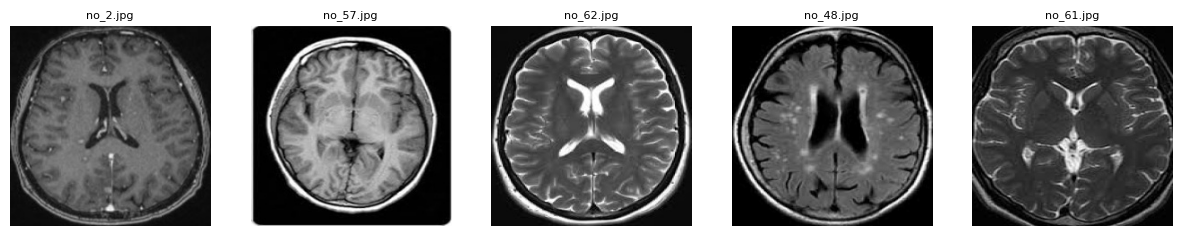

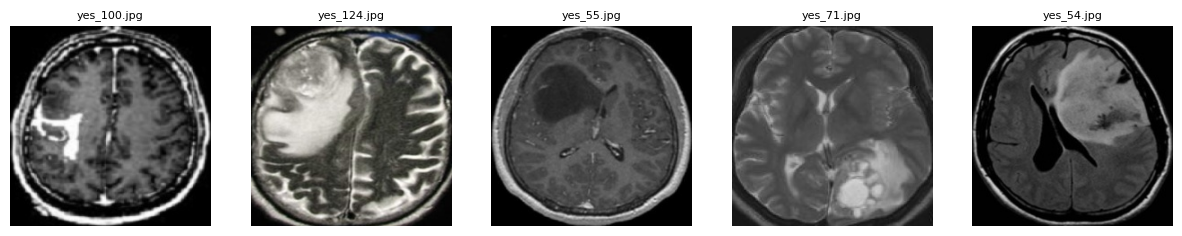

In [2]:

processed_folder = "brain_tumor_dataset2"
folder = ["no", "yes"]
for f in folder:
    folder_path = os.path.join(processed_folder, f)

    # Get image files (only jpg)
    image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith("jpg")])

    # Randomly select 5 images (if there are at least 5 images)
    num_images_to_display = 5
    image_files = random.sample(image_files, min(num_images_to_display, len(image_files)))

    # Load and display images in a single row
    fig, axes = plt.subplots(1, len(image_files), figsize=(15, 3))

    for ax, image_file in zip(axes, image_files):
        img_path = os.path.join(folder_path, image_file)
        img = cv2.imread(img_path)  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
        
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(image_file, fontsize=8)

    plt.show()


In [12]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Paths
dataset_path = "brain_tumor_dataset2"
output_dir = "brain_tumor_split2"

# Ensure the output directories exist
for split in ["train", "val", "test"]:
    for category in ["no", "yes"]:
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# Function to split images
def split_data(class_name):
    class_dir = os.path.join(dataset_path, class_name)
    images = np.array(os.listdir(class_dir))

    # Split into train (70%), validation (15%), test (15%)
    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    # Copy images to respective directories
    for img_set, split in zip([train_imgs, val_imgs, test_imgs], ["train", "val", "test"]):
        for img in img_set:
            shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, split, class_name))

# Apply splitting for both classes
split_data("no")
split_data("yes")

print("Dataset split")

Dataset split


In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

# Image Parameters
img_size = (224, 224)
batch_size = 32

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True,
    vertical_flip=True
)

# Validation & Test Data - Only Rescale
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data with 3 Channels (RGB)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="binary", color_mode="rgb"
)


val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode="binary", color_mode="rgb"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode="binary", color_mode="rgb", shuffle=False
)


print("Data Generators Ready")


Found 152 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Found 33 images belonging to 2 classes.
Data Generators Ready


In [84]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Lambda
import tensorflow as tf

# Load DenseNet121 with Pretrained Weights
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze Pretrained Layers
base_model.trainable = False  

# Custom Model Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
output_layer = Dense(1, activation="sigmoid")(x)  # Binary Classification

# Define Model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("DenseNet121 Model Ready")


# model.summary()


DenseNet121 Model Ready


In [ ]:
import numpy as np
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Adjust class weights
train_labels = train_generator.classes
class_weights = {0: 1.2, 1: 1.0}  

# Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.6,          # Reduce learning rate by a factor of 0.6
    patience=7,          # Wait for 7 epochs before reducing
    min_lr=1e-5,         # Minimum learning rate threshold
    verbose=1            # Print updates
)

# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    class_weight=class_weights,
    callbacks=[reduce_lr]  
)

print("✅ Training Complete")

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.5241 - loss: 0.9880 - val_accuracy: 0.7879 - val_loss: 0.5436 - learning_rate: 0.0010
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7741 - loss: 0.5775 - val_accuracy: 0.7273 - val_loss: 0.4617 - learning_rate: 0.0010
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8104 - loss: 0.4906 - val_accuracy: 0.8182 - val_loss: 0.4417 - learning_rate: 0.0010
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7857 - loss: 0.5400 - val_accuracy: 0.8788 - val_loss: 0.3845 - learning_rate: 0.0010
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8597 - loss: 0.4048 - val_accuracy: 0.8788 - val_loss: 0.3864 - learning_rate: 0.0010
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7997 - loss: 0.4395 - val_accuracy: 0.7879 - val_loss: 0.3637 - learning_rate: 0.0010
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8436 - loss: 0.3569 - val_accuracy: 0.8485 - val_los

In [74]:
model.save("brain_tumor_model_balanced.keras")  # Saves the entire model
print("length", len(test_generator))

# Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Final Test Accuracy: {test_acc:.2%}")

# Evaluate on Validation Data
val_loss, val_acc = model.evaluate(val_generator)
print(f"✅ Validation Accuracy: {val_acc:.2%}")


length 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9388 - loss: 0.1469
✅ Final Test Accuracy: 93.94%
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9081 - loss: 0.2920
✅ Validation Accuracy: 90.91%


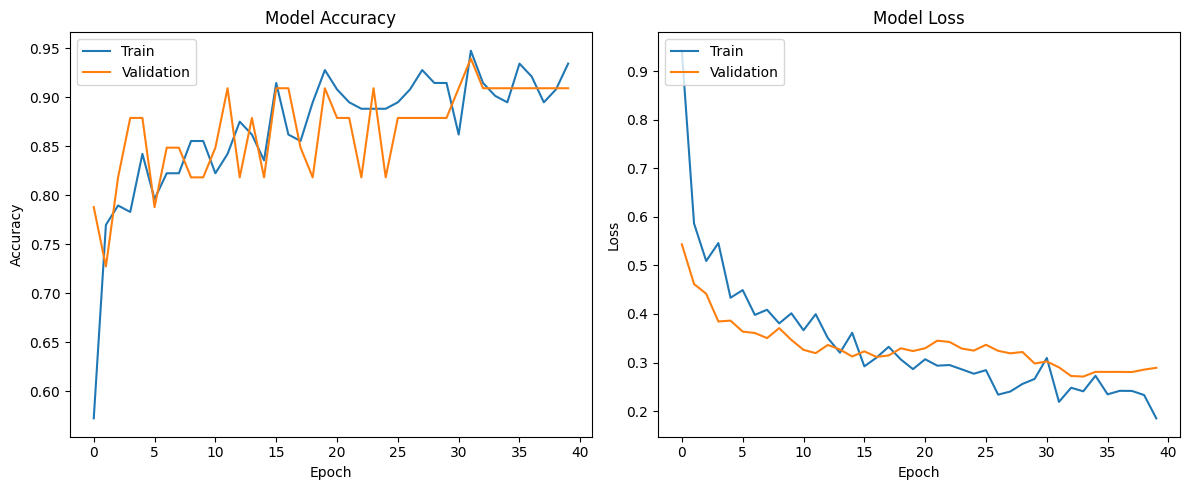

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()




2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
length 2


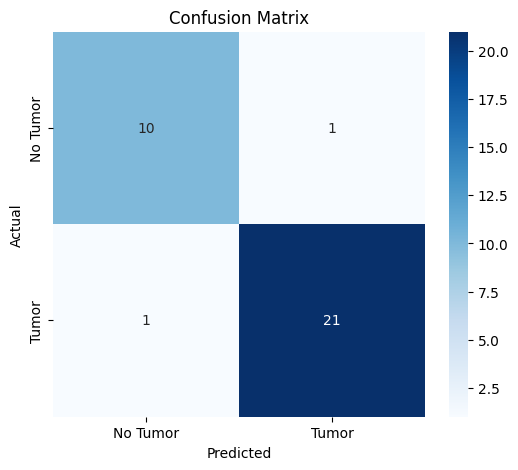

              precision    recall  f1-score   support

    No Tumor       0.91      0.91      0.91        11
       Tumor       0.95      0.95      0.95        22

    accuracy                           0.94        33
   macro avg       0.93      0.93      0.93        33
weighted avg       0.94      0.94      0.94        33



In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get the true labels from the test generator
y_true = test_generator.classes  # Actual labels (0 for 'no', 1 for 'yes')

# Get the predicted probabilities from the model
y_pred_probs = model.predict(test_generator).flatten()  # Flatten because it's a single-column output
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

print("length", len(test_generator))
# Create Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report for more detailed metrics
print(classification_report(y_true, y_pred, target_names=["No Tumor", "Tumor"]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


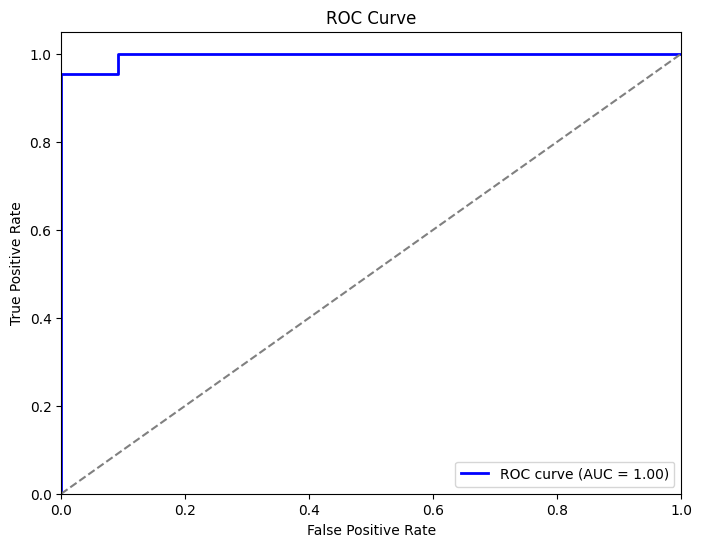

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels from the test generator
y_true = test_generator.classes  # Actual labels (0 for 'no', 1 for 'yes')

# Get the predicted probabilities from the model (flattened)
y_pred_probs = model.predict(test_generator).flatten()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)  # Calculate the area under the curve (AUC)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [85]:
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_24   │ (None, 230, 230,  │          0 │ input_layer_12[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_25   │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_2… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,300,161 (27.85 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)